train acc, test acc | 0.11236666666666667, 0.0
train acc, test acc | 0.79695, 0.0
train acc, test acc | 0.8767166666666667, 0.0
train acc, test acc | 0.8979833333333334, 0.0
train acc, test acc | 0.907, 0.0
train acc, test acc | 0.9142333333333333, 0.0
train acc, test acc | 0.9185666666666666, 0.0
train acc, test acc | 0.92325, 0.0
train acc, test acc | 0.9268666666666666, 0.0
train acc, test acc | 0.9290333333333334, 0.0
train acc, test acc | 0.9324, 0.0
train acc, test acc | 0.93595, 0.0
train acc, test acc | 0.9386, 0.0
train acc, test acc | 0.9404666666666667, 0.0
train acc, test acc | 0.94225, 0.0
train acc, test acc | 0.9437, 0.0
train acc, test acc | 0.9457666666666666, 0.0


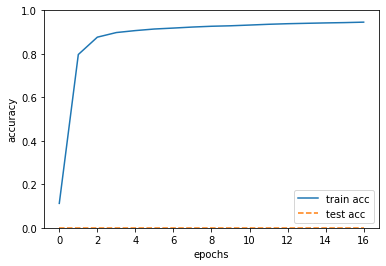

In [5]:
import numpy as np
import csv
import sys
import matplotlib.pyplot as plt
from mnist import load_mnist
from two_layer_net import TwoLayerNet

# command line에서 파일 읽어오기
train_image, train_label, test_image = sys.argv[1], sys.argv[2], sys.argv[3]

# 데이터 읽기
# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
(x_train, t_train), (x_test, t_test) = load_mnist(train_image, train_label, test_image, normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

f = open('test_predictions.csv', 'w', newline='', encoding='utf-8')
wf = csv.writer(f)

for i in range(len(x_test)):
    y = TwoLayerNet.predict(network, x_test[i])
    p = np.argmax(y)
    wf.writerow([p])

f.close()

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()